In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Make use of pandas to open up the 'foreveralone.csv'
foreveralone = pd.read_csv('foreveralone.csv')

In [3]:
# quick look at dataset
foreveralone.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,NaN
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",NaN


In [4]:
# Get a summary of the DataFrame, including non-null counts
foreveralone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   469 non-null    object 
 1   gender                 469 non-null    object 
 2   sexuallity             469 non-null    object 
 3   age                    469 non-null    int64  
 4   income                 469 non-null    object 
 5   race                   469 non-null    object 
 6   bodyweight             469 non-null    object 
 7   virgin                 469 non-null    object 
 8   prostitution_legal     469 non-null    object 
 9   pay_for_sex            469 non-null    object 
 10  friends                469 non-null    float64
 11  social_fear            469 non-null    object 
 12  depressed              469 non-null    object 
 13  what_help_from_others  469 non-null    object 
 14  attempt_suicide        469 non-null    object 
 15  employ

In [5]:
# Convert 'friends' column from float to integer
foreveralone['friends'] = foreveralone['friends'].astype('int64')

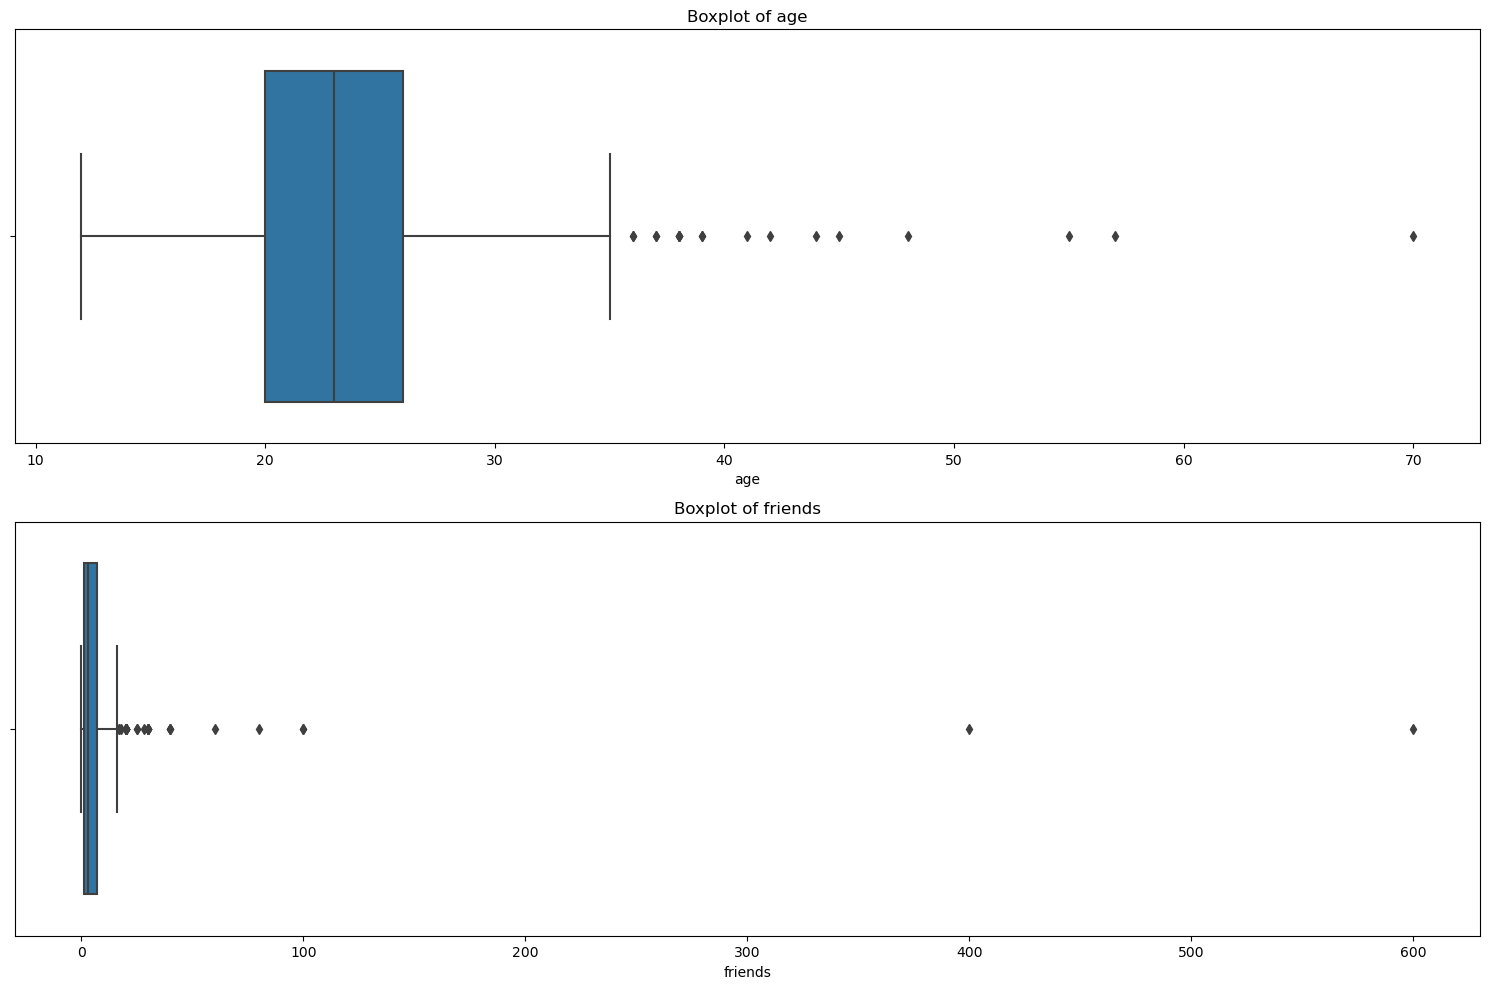

In [6]:
# Detecting outliers Plot boxplot for each numeric column
numeric_columns = foreveralone.select_dtypes(include=['int64']).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=foreveralone[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [7]:
# Cleaning Part 1 (Missing values) Check for missing values in each column
foreveralone.isnull().sum()

time                       0
gender                     0
sexuallity                 0
age                        0
income                     0
race                       0
bodyweight                 0
virgin                     0
prostitution_legal         0
pay_for_sex                0
friends                    0
social_fear                0
depressed                  0
what_help_from_others      0
attempt_suicide            0
employment                 0
job_title                 24
edu_level                  0
improve_yourself_how     106
dtype: int64

In [8]:
# Impute missing values in 'job_title' with 'Unknown'
foreveralone['job_title'].fillna('Unknown', inplace=True)

# Impute missing values in 'improve_yourself_how' with 'No response'
foreveralone['improve_yourself_how'].fillna('No response', inplace=True)

In [9]:
# Verify the changes
missing_values_after = foreveralone.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 time                     0
gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64


In [10]:
#Part II Remove special characters
import re

# Define a regex pattern for special characters
special_char_pattern = re.compile(r'[^\w\s]')  # Matches any character that is not a word character or whitespace

# Function to check for special characters in a column
def check_for_special_chars(column):
    return column.apply(lambda x: bool(special_char_pattern.search(str(x))))

# Apply the function to each column
special_char_results = pd.DataFrame()
for column in foreveralone.columns:
    special_char_results[column] = check_for_special_chars(foreveralone[column])

# Identify rows and columns with special characters
rows_with_special_chars = special_char_results.any(axis=1)
columns_with_special_chars = special_char_results.any(axis=0)

# Print columns with special characters
print("\nColumns with special characters:\n", columns_with_special_chars)


Columns with special characters:
 time                      True
gender                   False
sexuallity                True
age                      False
income                    True
race                      True
bodyweight               False
virgin                   False
prostitution_legal       False
pay_for_sex               True
friends                  False
social_fear              False
depressed                False
what_help_from_others     True
attempt_suicide          False
employment                True
job_title                 True
edu_level                 True
improve_yourself_how      True
dtype: bool


In [11]:
#Part II Remove Special Characters and correct spelling errors
# Define patterns to clean 'job_title'
special_chars_pattern = re.compile(r'[^\w\s]')
na_patterns = ['na', 'n/a', '-', '*', '.', 'serious?', 'dunno', 'student?', 'web desihner', 'jpo;', 'what?', 'ðŸŒš', 'ggg', 'rn']

# Function to clean job titles
def clean_job_titles(job):
    job = str(job).lower().strip()  # Convert to lowercase and strip whitespace
    if job in na_patterns:
        return 'unknown'  # Replace common patterns with 'unknown' or similar
    job = re.sub(special_chars_pattern, '', job)  # Remove special characters
    # Additional specific cleaning rules or mappings
    if job == 'web desihner':  # Correct specific spelling error
        return 'Web designer'
    elif job == 'jpo;':  # Replace unusual job title
        return 'unknown'
    elif job == 'what?':  # Replace ambiguous title
        return 'unknown'
    elif 'rn' in job:  # Handle job title containing 'rn'
        return job.replace('rn', 'Registered Nurse')
    return job

# Apply the function to 'job_title' column
foreveralone['job_title_cleaned'] = foreveralone['job_title'].apply(clean_job_titles)

# Display cleaned data
print(foreveralone['job_title_cleaned'].value_counts())

job_title_cleaned
student                       82
unknown                       50
none                          19
unemployed                    15
engineer                      12
                              ..
accounts receivable            1
zivildiener austrian stuff     1
freelance writer               1
self employed                  1
scientist                      1
Name: count, Length: 225, dtype: int64


In [12]:
# Part III 
print(foreveralone.columns)

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how', 'job_title_cleaned'],
      dtype='object')


In [13]:
# Part III Get all unique job types and their counts
job_types_counts = foreveralone['job_title_cleaned'].value_counts()

# Print all job types and their counts
with pd.option_context('display.max_rows', None):
    print(job_types_counts)

job_title_cleaned
student                                                                           82
unknown                                                                           50
none                                                                              19
unemployed                                                                        15
engineer                                                                          12
software engineer                                                                  7
software developer                                                                 7
nothing                                                                            6
                                                                                   5
inteRegistered Nurse                                                               5
cashier                                                                            5
clerk                                          

In [14]:
#Part IV Remove Special Characters and correct spelling errors
# Define a function to clean edu_level column
def clean_edu_level(edu_level):
    # Replace specific values
    if edu_level == 'Masterâ€™s degree':
        return 'Masters'
    elif edu_level == 'Bachelorâ€™s degree':
        return 'Bachelor'
    # Replace special characters and handle other cases
    cleaned_edu_level = edu_level.replace('â€™', "'")
    # Additional cleaning rules or mappings can be added here if needed
    return cleaned_edu_level

# Apply the cleaning function to 'edu_level' column
foreveralone['edu_level_cleaned'] = foreveralone['edu_level'].apply(clean_edu_level)

# Display the first 30 rows to confirm the changes
foreveralone[['edu_level','edu_level_cleaned']].head(20)

,edu_level,edu_level_cleaned
0,Associate degree,Associate degree
1,"Some college, no degree","Some college, no degree"
2,"Some college, no degree","Some college, no degree"
3,"Some college, no degree","Some college, no degree"
4,"High school graduate, diploma or the equivalen...","High school graduate, diploma or the equivalen..."
5,Bachelor’s degree,Bachelor’s degree
6,"High school graduate, diploma or the equivalen...","High school graduate, diploma or the equivalen..."
7,Trade/technical/vocational training,Trade/technical/vocational training
8,"Some college, no degree","Some college, no degree"
9,Master’s degree,Master’s degree


In [15]:
#Part V Add and define new income columns
# Define a function to categorize income ranges
def categorize_income(income_str):
    if income_str == '$0':
        return 'No Income'
    elif income_str in ['$1 to $10,000', '$10,000 to $19,999']:
        return 'Very Low Income'
    elif income_str in ['$20,000 to $29,999', '$30,000 to $39,999', '$40,000 to $49,999']:
        return 'Low Income'
    elif income_str in ['$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999']:
        return 'Average Income'
    elif income_str in ['$125,000 to $149,999', '$150,000 to $174,999', '$174,999 to $199,999']:
        return 'Above Average'
    elif income_str == '$200,000 or more':
        return 'High Income'
    else:
        return 'Very High Income'  # Any other cases are considered very high income

# create a new column 'income_category'
foreveralone['income_category'] = foreveralone['income'].apply(categorize_income)

In [16]:
# Part VI weight column 
 # Replace 'Obese' with 'Overweight'
foreveralone['bodyweight'] = foreveralone['bodyweight'].replace('Obese', 'Overweight')

# Display the updated DataFrame
print(foreveralone)

                   time  gender sexuallity  age              income  \
0    5/17/2016 20:04:18    Male   Straight   35  $30,000 to $39,999   
1    5/17/2016 20:04:30    Male   Bisexual   21       $1 to $10,000   
2    5/17/2016 20:04:58    Male   Straight   22                  $0   
3    5/17/2016 20:08:01    Male   Straight   19       $1 to $10,000   
4    5/17/2016 20:08:04    Male   Straight   23  $30,000 to $39,999   
..                  ...     ...        ...  ...                 ...   
464    6/2/2016 5:04:24  Female   Straight   26  $10,000 to $19,999   
465   6/3/2016 19:25:46    Male   Straight   31  $30,000 to $39,999   
466    6/6/2016 1:36:55  Female   Straight   17       $1 to $10,000   
467  8/14/2016 15:10:41    Male   Straight   18                  $0   
468   9/4/2016 23:10:04    Male   Straight   28  $40,000 to $49,999   

                   race     bodyweight virgin prostitution_legal  \
0    White non-Hispanic  Normal weight    Yes                 No   
1    White 

In [17]:
#Part VII # Define mapping dictionary
race_mapping = {
    'asian': 'Asian',
    'african': 'African',
    'black': 'African',
    'north african': 'African',
    'caucasian': 'Caucasian',
    'european': 'Caucasian',
    'white non-hispanic': 'Caucasian',
    'mixed': 'Mixed',
    'first two answers. gender is androgyne, not male; sexuality is asexual, not bi.': 'Mixed',
    'half arab': 'Mixed',
    'half asian half white': 'Mixed',
    'helicopterkin': 'Mixed',
    'hispanic (of any race)': 'Hispanic',
    'indian': 'Indian',
    'middle eastern': 'Middle Eastern',
    'pakistani': 'Middle Eastern',
    'turkish': 'Middle Eastern',
    'native american': 'Native American',
    'mixed race': 'Mixed',
    'mixed white/asian': 'Mixed',
    'multi': 'Mixed',
    'native american mix': 'Mixed',  # Include 'native american mix' in 'Mixed'
    'white and asian': 'Mixed',
    'white and native american': 'Mixed',
    'white non-hispanic': 'Caucasian'
}

# Apply mapping to 'race' column
foreveralone['race'] = foreveralone['race'].str.lower().replace(race_mapping)

# Check the unique values after mapping
print(foreveralone['race'].unique())

['Caucasian' 'Hispanic' 'Asian' 'Mixed' 'African' 'Middle Eastern'
 'Indian' 'Native American']


In [18]:
#Part VIII pay_for_sex to standardize to yes and no 

# Replace 'Yes but I haven't' with 'Yes' in foreveralone DataFrame
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].replace({'Yes but I haven\'t': 'Yes'})

# Replace 'Yes and I have' with 'Yes' in foreveralone DataFrame
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].replace({'Yes and I have': 'Yes'})

# Show the updated DataFrame to confirm changes
print(foreveralone['pay_for_sex'].value_counts())

pay_for_sex
No     318
Yes    151
Name: count, dtype: int64


In [19]:
#Part IX #Binning
columns_to_check = ['virgin', 'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed', 'attempt_suicide']

for col in columns_to_check:
    unique_values = foreveralone[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'virgin': ['Yes' 'No']
Unique values in 'prostitution_legal': ['No' 'Yes']
Unique values in 'pay_for_sex': ['No' 'Yes']
Unique values in 'social_fear': ['Yes' 'No']
Unique values in 'depressed': ['Yes' 'No']
Unique values in 'attempt_suicide': ['Yes' 'No']


In [20]:
# Map 'Yes' to 1 and 'No' to 0 for boolean conversion
foreveralone['virgin'] = foreveralone['virgin'].map({'Yes': 1, 'No': 0})
foreveralone['prostitution_legal'] = foreveralone['prostitution_legal'].map({'Yes': 1, 'No': 0})
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].map({'Yes': 1, 'No': 0})
foreveralone['social_fear'] = foreveralone['social_fear'].map({'Yes': 1, 'No': 0})
foreveralone['depressed'] = foreveralone['depressed'].map({'Yes': 1, 'No': 0})
foreveralone['attempt_suicide'] = foreveralone['attempt_suicide'].map({'Yes': 1, 'No': 0})

# Display the updated DataFrame to verify the changes
print(foreveralone[['virgin', 'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed', 'attempt_suicide']].head())

   virgin  prostitution_legal  pay_for_sex  social_fear  depressed  \
0       1                   0            0            1          1   
1       1                   0            0            1          1   
2       1                   0            0            1          1   
3       1                   1            0            1          1   
4       0                   0            1            0          1   

   attempt_suicide  
0                1  
1                0  
2                0  
3                0  
4                0  


In [21]:
# Check value counts in 'virgin' column
print("\nValue counts for 'virgin':")
print(foreveralone['virgin'].value_counts())

# Check value counts to see how many 'No' and 'Yes' are present in 'pay_for_sex' column
print("\nValue counts for 'pay_for_sex':")
print(foreveralone['pay_for_sex'].value_counts())


Value counts for 'virgin':
virgin
1    352
0    117
Name: count, dtype: int64

Value counts for 'pay_for_sex':
pay_for_sex
0    318
1    151
Name: count, dtype: int64


In [22]:
#Part X #Age - create a new colum to show the age cotegory

# Define the bins and labels for generational categories based on age ranges
bins = [0, 24, 39, 49, 64, float('inf')]  # Define age ranges for each generation
labels = ['Gen Z', 'Millennial', 'Gen X', 'Baby Boomer', 'Gen Alpha']

# Create a new column 'generation' based on the bins and labels
foreveralone['generation'] = pd.cut(foreveralone['age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with generation column
print(foreveralone.head())

                 time gender sexuallity  age              income       race  \
0  5/17/2016 20:04:18   Male   Straight   35  $30,000 to $39,999  Caucasian   
1  5/17/2016 20:04:30   Male   Bisexual   21       $1 to $10,000  Caucasian   
2  5/17/2016 20:04:58   Male   Straight   22                  $0  Caucasian   
3  5/17/2016 20:08:01   Male   Straight   19       $1 to $10,000  Caucasian   
4  5/17/2016 20:08:04   Male   Straight   23  $30,000 to $39,999  Caucasian   

      bodyweight  virgin  prostitution_legal  pay_for_sex  ...  \
0  Normal weight       1                   0            0  ...   
1    Underweight       1                   0            0  ...   
2     Overweight       1                   0            0  ...   
3     Overweight       1                   1            0  ...   
4     Overweight       0                   0            1  ...   

                               what_help_from_others  attempt_suicide  \
0           wingman/wingwoman, Set me up with a date   

In [ ]:
# Logical check to 

In [23]:
# Specify the file path where you want to save the Excel file
excel_file_path = 'foreveralone(final).xlsx'

# Export DataFrame to Excel
foreveralone.to_excel(excel_file_path, index=False)

print(f"DataFrame successfully exported to Excel file: {excel_file_path}")

DataFrame successfully exported to Excel file: foreveralone(final).xlsx


C:\Users\Julie CHUA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


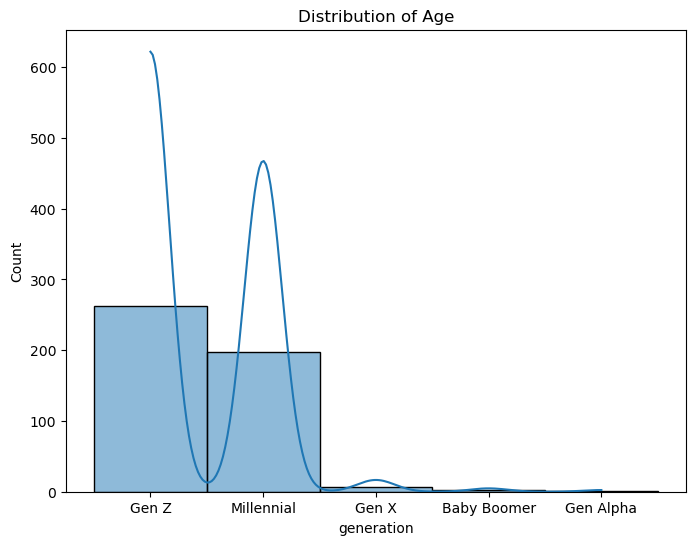

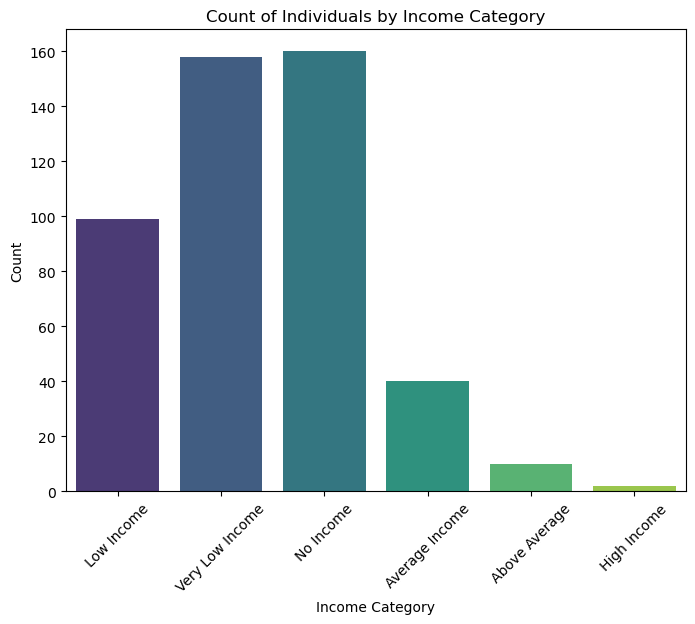

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=foreveralone, x='generation', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('generation')
plt.ylabel('Count')
plt.show()

# Bar plot of Income Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=foreveralone, x='income_category', palette='viridis')
plt.title('Count of Individuals by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

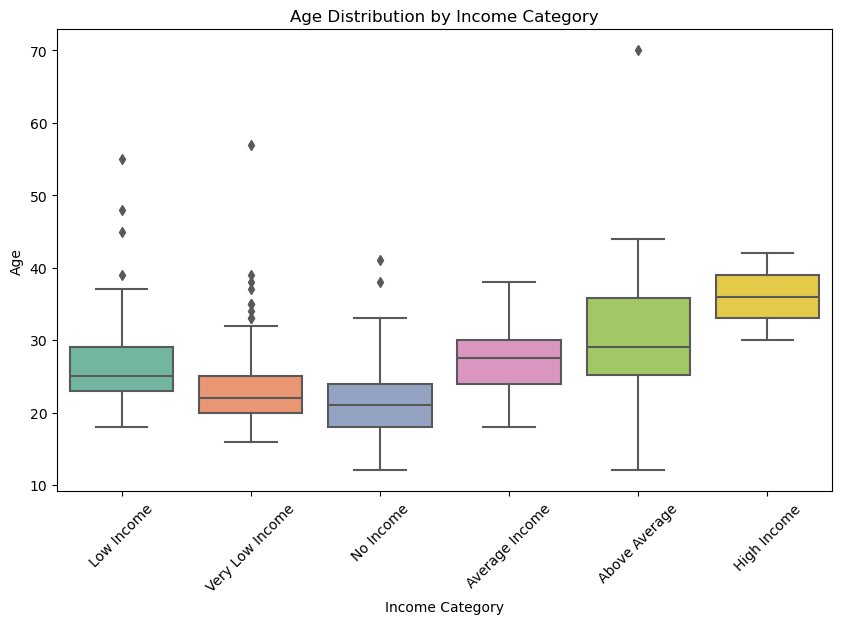

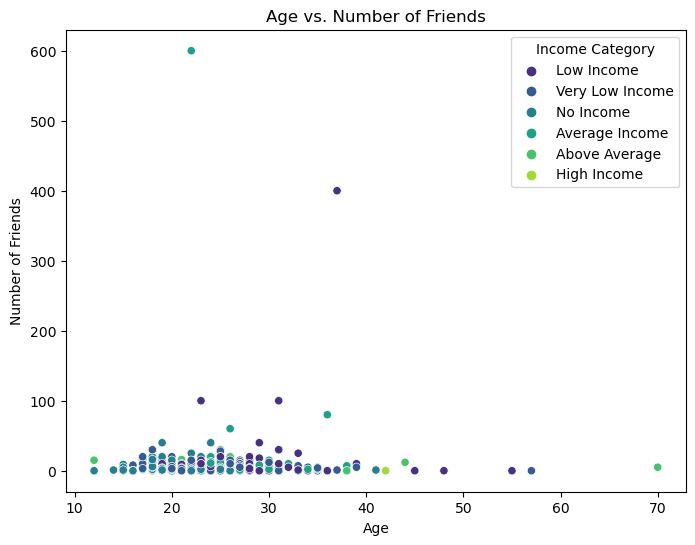

In [25]:
# Box plot of Age by Income Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=foreveralone, x='income_category', y='age', palette='Set2')
plt.title('Age Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of Age vs. Friends
plt.figure(figsize=(8, 6))
sns.scatterplot(data=foreveralone, x='age', y='friends', hue='income_category', palette='viridis')
plt.title('Age vs. Number of Friends')
plt.xlabel('Age')
plt.ylabel('Number of Friends')
plt.legend(title='Income Category')
plt.show()

C:\Users\Julie CHUA\AppData\Local\Temp\ipykernel_21440\4035993044.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legend_labels = [f"{race} - {percentages[idx]}%" for idx, race in enumerate(race_counts.index)]


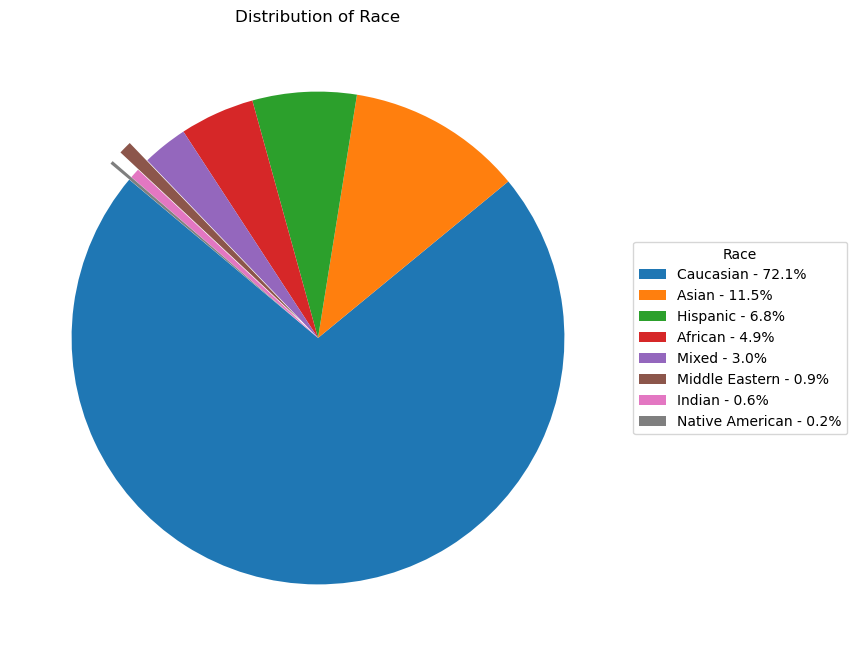

In [26]:
# Assuming 'foreveralone' DataFrame is already loaded
# Generate the race_counts
race_counts = foreveralone['race'].value_counts()

# Explode settings to separate the slices
explode = [0.1 if race in ['Native American', 'Middle Eastern'] else 0 for race in race_counts.index]

# Calculate the percentages for the legend
percentages = (race_counts / race_counts.sum() * 100).round(1)
legend_labels = [f"{race} - {percentages[idx]}%" for idx, race in enumerate(race_counts.index)]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(race_counts, labels=None, startangle=140, explode=explode, textprops={'fontsize': 10, 'color': 'black'})

# Add legend outside of the plot for clarity
plt.legend(legend_labels, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.title('Distribution of Race')
plt.show()

Julie and Ken will proceed to use the exported Excel file foreveralone(final).xlsx for further cleaning according to the needs of the business objectives specified.